In [0]:
%matplotlib inline
import numpy as np
from scipy.stats import gamma, norm, beta, chi2, f
import matplotlib.pyplot as plt

https://drive.google.com/open?id=1kqjxeke9ovXSzTF283V6THSEusbsjwxS

ЦПТ для другого распределения, доработать бутстреп и понять интервалы (презы прочитать, пересмотреть).

## Центральная предельная теорема

# Для $\chi^2$

In [6]:
chi2.rvs(df=2, size=10)

array([0.0707822 , 3.45972163, 0.04951382, 1.02648554, 1.72761981,
       0.78527262, 0.80643069, 0.08547226, 0.37640874, 8.85120402])

Посчитать mean с заданным их кол-вом, нарисовать гистограмму и построить нормальное распр-е со средним, равным а, и дисперсией, равной $а/sqrt(N)$.

In [0]:
def check_chi(df, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(chi2.rvs(df, size=size))
  #means = [np.mean(gamma.rvs(a)) for i in size]
  plt.hist(sample_mean, density=True, bins=10)#, range=(0.01, 0.99))
  a = chi2.mean(df)
  #a = np.mean(sample_mean)
  start = norm.ppf(0.01, loc=a, scale=np.sqrt(a))
  end = norm.ppf(0.99, loc=a, scale=np.sqrt(a))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=a, scale=a / np.sqrt(size))
  plt.plot(x, y, 'r', marker='.')

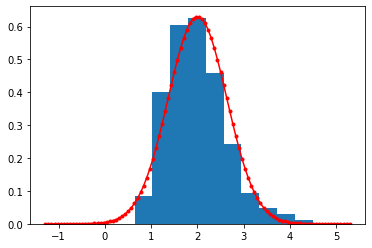

In [25]:
check_chi(2, 10)

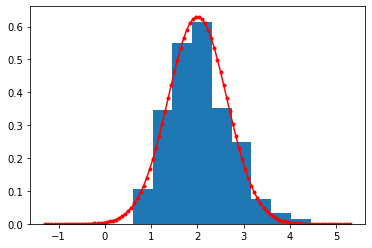

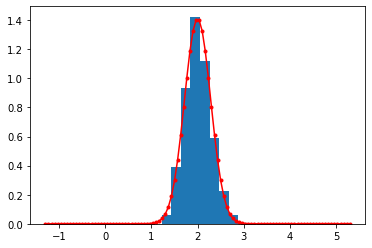

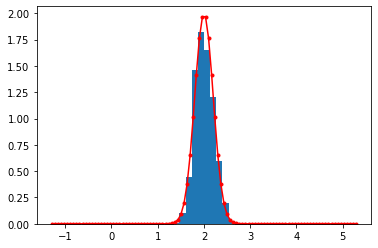

In [26]:
plt.subplots(); check_chi(2, 10)
plt.subplots(); check_chi(2, 50)
plt.subplots(); check_chi(2, 100)

Ну почти...

# Для Фишера

In [16]:
f.rvs(dfn=2, dfd=100, size=10)

array([0.94627233, 2.92504977, 1.5152283 , 4.04032642, 0.37478643,
       2.04685613, 0.05745971, 0.6450956 , 0.29054552, 0.68205328])

In [0]:
def check_f(dfn, dfd, size):
  sample_mean = np.zeros(1000)
  for i in range(1000):
    sample_mean[i] = np.mean(f.rvs(dfn, dfd, size=size))
  #means = [np.mean(gamma.rvs(a)) for i in size]
  plt.hist(sample_mean, density=True)#, range=(0.01, 0.99))
  mean_a = np.mean(sample_mean)
  #mean_std = np.std(sample_mean)
  start = norm.ppf(0.01, loc=mean_a, scale=np.sqrt(mean_a))
  end = norm.ppf(0.99, loc=mean_a, scale=np.sqrt(mean_a))
  x = np.linspace(start, end, 100)
  y = norm.pdf(x, loc=mean_a, scale=mean_a / np.sqrt(size))
  plt.plot(x, y, 'r', marker='.')

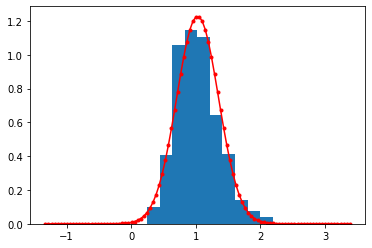

In [32]:
check_f(2, 100, 10)

Ой как здорово!

# В итоге

Как видно из графиков, среднее для случайных величин можно описать нормальным распределением со средним, равным этому же среднему, и дисперсией, равной изначальному среднему на корень из размера. И это работает для всех.

# В классе что делали

In [0]:
norm.pdf(0, 1)

0.24197072451914337

In [0]:
def draw_gamma(a, size):
  start = gamma.ppf(0.01, a)
  end = gamma.ppf(0.99, a)
  x = np.linspace(start, end, 100)
  sample = gamma.rvs(a=a, size=size)
  y = gamma.pdf(x, a)
  plt.plot(x, y, 'r', marker='.')
  plt.hist(sample, density=True, range=(start, end), bins=100)

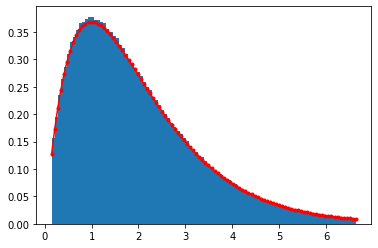

In [0]:
draw_gamma(2, 1000000)

Почти совпадают!

In [0]:
gamma.ppf(0.99, 2)

6.638352067993811

PPF отвечает на вопрос, в какой точке находится 99% (или заданное число) значений.

In [0]:
gamma.ppf(0.01, 2)

0.14855474025326595

# Бутстреп

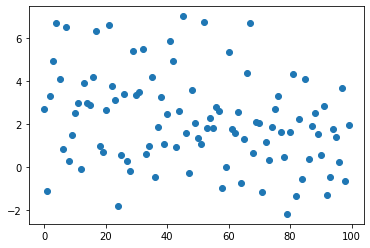

In [0]:
sample = norm.rvs(loc=2, scale=2, size=100)
plt.plot(sample, 'o', ls='none')

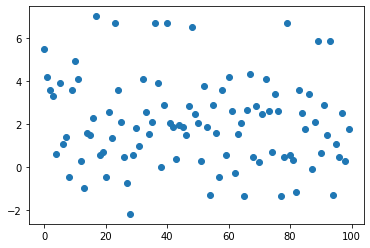

In [0]:
pseudo_samples = [np.random.choice(sample, size=len(sample)) for i in range(1000)]
plt.plot(pseudo_samples[0], 'o', ls='none')

In [0]:
len(pseudo_samples)

1000

In [0]:
pseudo_means = [np.mean(p_s) for p_s in pseudo_samples]
len(pseudo_means)

1000

In [0]:
np.percentile(pseudo_means, [0.025, 0.975])

array([1.52349227, 1.72666422])

Среднее довольно сильно отличается от выставленного нами - так сгенерились данные.

In [0]:
from statsmodels.stats.weightstats import _tconfint_generic, _zconfint_generic

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
np.mean(sample)

2.174107697105587

In [0]:
np.std(sample)

2.1154646782135718

In [0]:
_zconfint_generic(np.mean(sample), np.sqrt(4 / 1000), 0.05, 'two-sided')

(2.0501486906446744, 2.2980667035664992)

In [0]:
_tconfint_generic(np.mean(sample), (np.std(sample) / np.sqrt(len(sample))), 999, 0.05, 'two-sided')

(1.7589812923434047, 2.5892341018677687)

Вот и наши среднее и стандартное отклонение попали в интервал. Заметим, что степень уверенности - разная.